In [8]:
import numpy as np
import os
import pandas as pd
import cv2
import glob
import matplotlib.image as mpimg
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

seed = 314
tf.random.set_seed(seed)
np.random.seed(seed)

cur_dir = os.getcwd()
cur_dir

'C:\\Users\\Priya'

In [9]:
train_path = cur_dir + "\\Yoga_5_asana\\DATASET\\TRAIN\\"
train_path

'C:\\Users\\Priya\\Yoga_5_asana\\DATASET\\TRAIN\\'

In [10]:
test_path = cur_dir + "\\Yoga_5_asana\\DATASET\\TEST\\"
test_path

'C:\\Users\\Priya\\Yoga_5_asana\\DATASET\\TEST\\'

In [11]:
from tensorflow.keras import Sequential, layers

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1/255, 
    shear_range = 0.2, 
    zoom_range = 0.2,
    horizontal_flip = True 
)

test_datagen = ImageDataGenerator(
    rescale = 1/ 255,
    horizontal_flip = True,
    validation_split=0.25,
)

In [13]:
img_size = 128

train_gen = train_datagen.flow_from_directory(
    train_path,
    batch_size = 16,
    class_mode = 'categorical',
    target_size = (img_size, img_size),
    shuffle = True,
    seed = 314
)

test_gen = test_datagen.flow_from_directory(
    test_path,
    batch_size = 16,
    class_mode = 'categorical',
    target_size = (img_size, img_size),
    shuffle = True,
    seed = seed,
    subset='training', 
)

val_gen = test_datagen.flow_from_directory(
    test_path,
    batch_size = 16,
    class_mode = 'categorical',
    target_size = (img_size, img_size),
    shuffle = True,
    seed = seed,
    subset='validation',
)

Found 1081 images belonging to 5 classes.
Found 354 images belonging to 5 classes.
Found 116 images belonging to 5 classes.


In [14]:
model = Sequential([
    layers.InputLayer(input_shape=[img_size, img_size, 3]),
    layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])

In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.005,
    patience=5,
    restore_best_weights=True
)
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

history = model.fit(
    train_gen,
    validation_data = val_gen,
    epochs = 20,
    callbacks = [early_stopping]
)

Epoch 1/20
15/68 [=====>........................] - ETA: 23s - loss: 1.7292 - accuracy: 0.1958

C:\Users\Priya\anaconda31\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


68/68 [==============================] - 43s 612ms/step - loss: 1.6248 - accuracy: 0.2479 - val_loss: 1.5644 - val_accuracy: 0.4828
Epoch 2/20
68/68 [==============================] - 31s 455ms/step - loss: 1.4569 - accuracy: 0.3756 - val_loss: 0.9400 - val_accuracy: 0.6724
Epoch 3/20
68/68 [==============================] - 28s 409ms/step - loss: 1.2177 - accuracy: 0.4986 - val_loss: 0.6712 - val_accuracy: 0.7414
Epoch 4/20
68/68 [==============================] - 27s 401ms/step - loss: 1.0772 - accuracy: 0.5800 - val_loss: 0.5549 - val_accuracy: 0.7241
Epoch 5/20
68/68 [==============================] - 27s 396ms/step - loss: 0.9248 - accuracy: 0.6438 - val_loss: 0.4949 - val_accuracy: 0.8190
Epoch 6/20
68/68 [==============================] - 29s 432ms/step - loss: 0.8333 - accuracy: 0.6799 - val_loss: 0.3527 - val_accuracy: 0.8707
Epoch 7/20
68/68 [==============================] - 30s 438ms/step - loss: 0.7418 - accuracy: 0.7290 - val_loss: 0.3541 - val_accuracy: 0.8621
Epoch 8/20

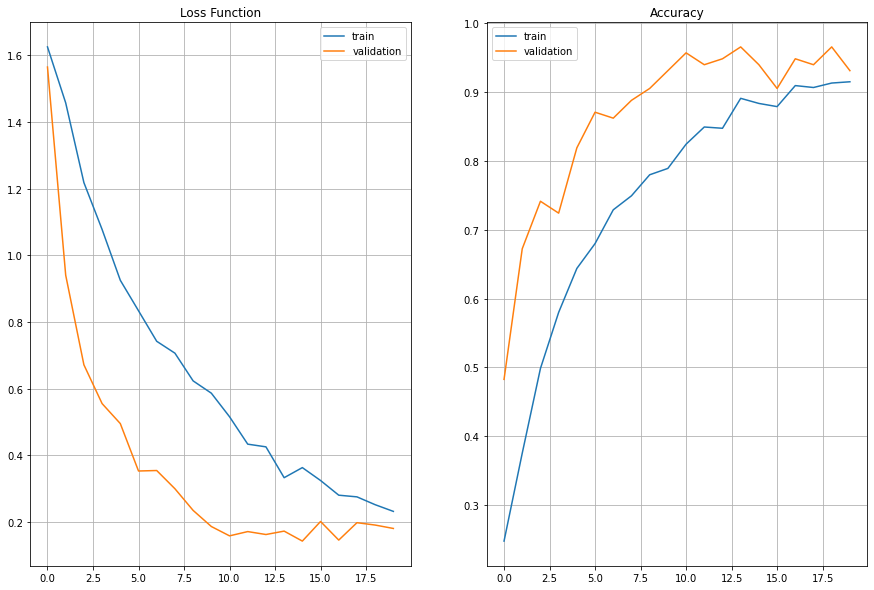

In [17]:
plt.figure(figsize=(15, 10))

# plot the loss function
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Function')
plt.grid(True)
plt.legend()

# and the accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.grid(True)
plt.title('Accuracy')
plt.legend()

plt.show()

In [18]:
from sklearn.metrics import classification_report
y_pred = model.predict(test_gen)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(test_gen.classes, y_pred))

23/23 [==============================] - 14s 616ms/step
              precision    recall  f1-score   support

           0       0.31      0.30      0.30        73
           1       0.23      0.23      0.23        60
           2       0.22      0.22      0.22        87
           3       0.20      0.19      0.19        52
           4       0.24      0.24      0.24        82

    accuracy                           0.24       354
   macro avg       0.24      0.24      0.24       354
weighted avg       0.24      0.24      0.24       354



In [19]:
classnames = []
for dir in os.listdir(train_path):
    classnames.append(dir) # append the folder name, the class

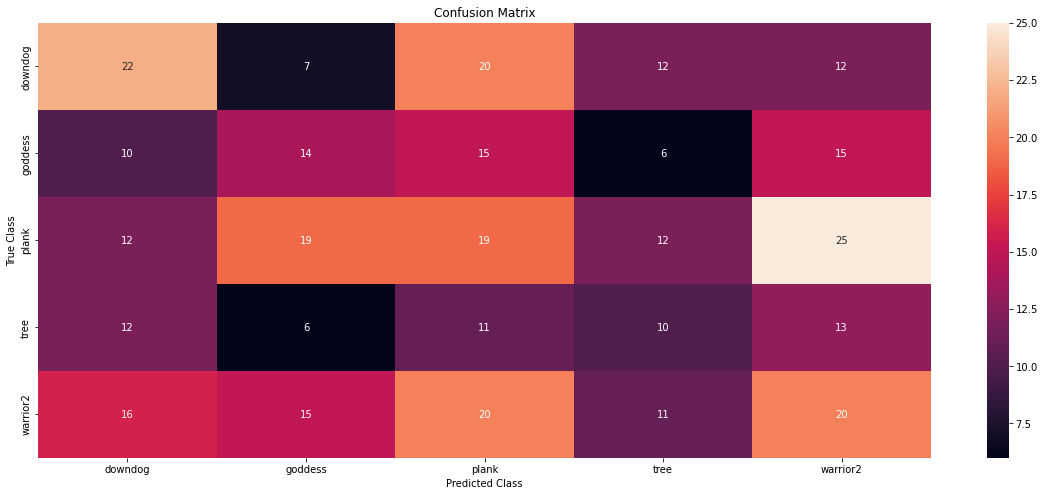

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# define the matrix with the real classes and the predicted
m = confusion_matrix(test_gen.classes, y_pred)
# the labels for the plot
labels = classnames
plt.figure(figsize=(20, 8))
# create the plot
heatmap = sns.heatmap(m, xticklabels=labels, yticklabels=labels, annot=True, fmt='d', color='blue')
# labels for the axes
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [21]:
model.save('cnn_yoga_5_model')

INFO:tensorflow:Assets written to: cnn_yoga_5_model\assets


INFO:tensorflow:Assets written to: cnn_yoga_5_model\assets


In [22]:
from tensorflow import keras
model_loaded = keras.models.load_model('cnn_yoga_5_model')

{'downdog': 0, 'goddess': 1, 'plank': 2, 'tree': 3, 'warrior2': 4}

In [25]:
import pickle

with open('saved_dictionary_5_yoga.pkl', 'wb') as f:
    pickle.dump(train_gen.class_indices, f)